<a href="https://colab.research.google.com/github/selfor21/NLP---Natural-Language-Processing/blob/main/NPL_Intro_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 03 - Language Models and Vetorial Representation



# Introduction

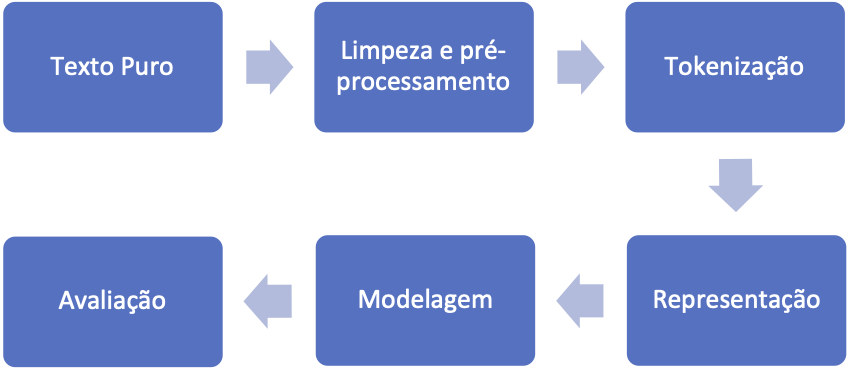

In [1]:
# install packages
!pip install keras nltk scikit-learn # nltk==3.5 # (caso precise especificar a versão)

# Step 01. Corpus

In [2]:
poema = """E agora, José?
A festa acabou,
a luz apagou,
o povo sumiu,
a noite esfriou,
e agora, José?
e agora, você?
você que é sem nome,
que zomba dos outros,
você que faz versos,
que ama, protesta?
e agora, José?

Está sem mulher,
está sem discurso,
está sem carinho,
já não pode beber,
já não pode fumar,
cuspir já não pode,
a noite esfriou,
o dia não veio,
o bonde não veio,
o riso não veio,
não veio a utopia
e tudo acabou
e tudo fugiu
e tudo mofou,
e agora, José?

E agora, José?
Sua doce palavra,
seu instante de febre,
sua gula e jejum,
sua biblioteca,
sua lavra de ouro,
seu terno de vidro,
sua incoerência,
seu ódio - e agora?

Com a chave na mão
quer abrir a porta,
não existe porta;
quer morrer no mar,
mas o mar secou;
quer ir para Minas,
Minas não há mais.
José, e agora?

Se você gritasse,
se você gemesse,
se você tocasse
a valsa vienense,
se você dormisse,
se você cansasse,
se você morresse...
Mas você não morre,
você é duro, José!

Sozinho no escuro
qual bicho-do-mato,
sem teogonia,
sem parede nua
para se encostar,
sem cavalo preto
que fuja a galope,
você marcha, José!
José, para onde?"""


# Step 02. Tokenizing *corpus*


In [3]:
import nltk
from nltk import tokenize

nltk.download('punkt') # dowloadl tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Split lower case sentences.

In [4]:
poema = poema.lower().split("\n")
poema

['e agora, josé?',
 'a festa acabou,',
 'a luz apagou,',
 'o povo sumiu,',
 'a noite esfriou,',
 'e agora, josé?',
 'e agora, você?',
 'você que é sem nome,',
 'que zomba dos outros,',
 'você que faz versos,',
 'que ama, protesta?',
 'e agora, josé?',
 '',
 'está sem mulher,',
 'está sem discurso,',
 'está sem carinho,',
 'já não pode beber,',
 'já não pode fumar,',
 'cuspir já não pode,',
 'a noite esfriou,',
 'o dia não veio,',
 'o bonde não veio,',
 'o riso não veio,',
 'não veio a utopia',
 'e tudo acabou',
 'e tudo fugiu',
 'e tudo mofou,',
 'e agora, josé?',
 '',
 'e agora, josé?',
 'sua doce palavra,',
 'seu instante de febre,',
 'sua gula e jejum,',
 'sua biblioteca,',
 'sua lavra de ouro,',
 'seu terno de vidro,',
 'sua incoerência,',
 'seu ódio - e agora?',
 '',
 'com a chave na mão',
 'quer abrir a porta,',
 'não existe porta;',
 'quer morrer no mar,',
 'mas o mar secou;',
 'quer ir para minas,',
 'minas não há mais.',
 'josé, e agora?',
 '',
 'se você gritasse,',
 'se você 

In [5]:
texto_tok = []
for verso in poema:
  tokens = tokenize.word_tokenize(verso, language="portuguese")
  texto_tok.append(tokens)

texto_tok

[['e', 'agora', ',', 'josé', '?'],
 ['a', 'festa', 'acabou', ','],
 ['a', 'luz', 'apagou', ','],
 ['o', 'povo', 'sumiu', ','],
 ['a', 'noite', 'esfriou', ','],
 ['e', 'agora', ',', 'josé', '?'],
 ['e', 'agora', ',', 'você', '?'],
 ['você', 'que', 'é', 'sem', 'nome', ','],
 ['que', 'zomba', 'dos', 'outros', ','],
 ['você', 'que', 'faz', 'versos', ','],
 ['que', 'ama', ',', 'protesta', '?'],
 ['e', 'agora', ',', 'josé', '?'],
 [],
 ['está', 'sem', 'mulher', ','],
 ['está', 'sem', 'discurso', ','],
 ['está', 'sem', 'carinho', ','],
 ['já', 'não', 'pode', 'beber', ','],
 ['já', 'não', 'pode', 'fumar', ','],
 ['cuspir', 'já', 'não', 'pode', ','],
 ['a', 'noite', 'esfriou', ','],
 ['o', 'dia', 'não', 'veio', ','],
 ['o', 'bonde', 'não', 'veio', ','],
 ['o', 'riso', 'não', 'veio', ','],
 ['não', 'veio', 'a', 'utopia'],
 ['e', 'tudo', 'acabou'],
 ['e', 'tudo', 'fugiu'],
 ['e', 'tudo', 'mofou', ','],
 ['e', 'agora', ',', 'josé', '?'],
 [],
 ['e', 'agora', ',', 'josé', '?'],
 ['sua', 'doce', 'pa

# Step 03. Begin / End sentence tag´s.

NLTK method `pad_both_ends`

Bigrams

In [6]:
from nltk.lm.preprocessing import pad_both_ends

ngramas = 2

texto_tok_pad = []

for verso in texto_tok:
  padded = list(pad_both_ends(verso,n=ngramas))
  texto_tok_pad.append(padded)

texto_tok_pad

[['<s>', 'e', 'agora', ',', 'josé', '?', '</s>'],
 ['<s>', 'a', 'festa', 'acabou', ',', '</s>'],
 ['<s>', 'a', 'luz', 'apagou', ',', '</s>'],
 ['<s>', 'o', 'povo', 'sumiu', ',', '</s>'],
 ['<s>', 'a', 'noite', 'esfriou', ',', '</s>'],
 ['<s>', 'e', 'agora', ',', 'josé', '?', '</s>'],
 ['<s>', 'e', 'agora', ',', 'você', '?', '</s>'],
 ['<s>', 'você', 'que', 'é', 'sem', 'nome', ',', '</s>'],
 ['<s>', 'que', 'zomba', 'dos', 'outros', ',', '</s>'],
 ['<s>', 'você', 'que', 'faz', 'versos', ',', '</s>'],
 ['<s>', 'que', 'ama', ',', 'protesta', '?', '</s>'],
 ['<s>', 'e', 'agora', ',', 'josé', '?', '</s>'],
 ['<s>', '</s>'],
 ['<s>', 'está', 'sem', 'mulher', ',', '</s>'],
 ['<s>', 'está', 'sem', 'discurso', ',', '</s>'],
 ['<s>', 'está', 'sem', 'carinho', ',', '</s>'],
 ['<s>', 'já', 'não', 'pode', 'beber', ',', '</s>'],
 ['<s>', 'já', 'não', 'pode', 'fumar', ',', '</s>'],
 ['<s>', 'cuspir', 'já', 'não', 'pode', ',', '</s>'],
 ['<s>', 'a', 'noite', 'esfriou', ',', '</s>'],
 ['<s>', 'o', 'dia'

# Step 04. Calculating n-grams

Usando um método do NLTK que se chama `nltk.ngrams`

In [ ]:
ngramas = 2

bigramas_poema = []
for verso in texto_tok_pad:
  bigramas = list(nltk.ngrams(verso, n=ngramas))
  bigramas_poema.append(bigramas)

bigramas_poema

WE need the n-grams with small size defined. Method `nltk.everygrams` .



In [8]:
from nltk.util import everygrams

tam_ngrama = 3

ngramas_poema = []
for verso in texto_tok_pad:
  ngramas = list(everygrams(verso, max_len=tam_ngrama))
  ngramas_poema.append(ngramas)

ngramas_poema

[[('<s>',),
  ('<s>', 'e'),
  ('<s>', 'e', 'agora'),
  ('e',),
  ('e', 'agora'),
  ('e', 'agora', ','),
  ('agora',),
  ('agora', ','),
  ('agora', ',', 'josé'),
  (',',),
  (',', 'josé'),
  (',', 'josé', '?'),
  ('josé',),
  ('josé', '?'),
  ('josé', '?', '</s>'),
  ('?',),
  ('?', '</s>'),
  ('</s>',)],
 [('<s>',),
  ('<s>', 'a'),
  ('<s>', 'a', 'festa'),
  ('a',),
  ('a', 'festa'),
  ('a', 'festa', 'acabou'),
  ('festa',),
  ('festa', 'acabou'),
  ('festa', 'acabou', ','),
  ('acabou',),
  ('acabou', ','),
  ('acabou', ',', '</s>'),
  (',',),
  (',', '</s>'),
  ('</s>',)],
 [('<s>',),
  ('<s>', 'a'),
  ('<s>', 'a', 'luz'),
  ('a',),
  ('a', 'luz'),
  ('a', 'luz', 'apagou'),
  ('luz',),
  ('luz', 'apagou'),
  ('luz', 'apagou', ','),
  ('apagou',),
  ('apagou', ','),
  ('apagou', ',', '</s>'),
  (',',),
  (',', '</s>'),
  ('</s>',)],
 [('<s>',),
  ('<s>', 'o'),
  ('<s>', 'o', 'povo'),
  ('o',),
  ('o', 'povo'),
  ('o', 'povo', 'sumiu'),
  ('povo',),
  ('povo', 'sumiu'),
  ('povo', 'su

# Step 05. All *tokens* from *corpus* in one single list

Para isso vamos usar o método `nltk.lm.preprocessing.flatten` que junta os elementos de todas as listas em uma única.

In [9]:
from nltk.lm.preprocessing import flatten

tokens = list(flatten(texto_tok_pad))
tokens

['<s>',
 'e',
 'agora',
 ',',
 'josé',
 '?',
 '</s>',
 '<s>',
 'a',
 'festa',
 'acabou',
 ',',
 '</s>',
 '<s>',
 'a',
 'luz',
 'apagou',
 ',',
 '</s>',
 '<s>',
 'o',
 'povo',
 'sumiu',
 ',',
 '</s>',
 '<s>',
 'a',
 'noite',
 'esfriou',
 ',',
 '</s>',
 '<s>',
 'e',
 'agora',
 ',',
 'josé',
 '?',
 '</s>',
 '<s>',
 'e',
 'agora',
 ',',
 'você',
 '?',
 '</s>',
 '<s>',
 'você',
 'que',
 'é',
 'sem',
 'nome',
 ',',
 '</s>',
 '<s>',
 'que',
 'zomba',
 'dos',
 'outros',
 ',',
 '</s>',
 '<s>',
 'você',
 'que',
 'faz',
 'versos',
 ',',
 '</s>',
 '<s>',
 'que',
 'ama',
 ',',
 'protesta',
 '?',
 '</s>',
 '<s>',
 'e',
 'agora',
 ',',
 'josé',
 '?',
 '</s>',
 '<s>',
 '</s>',
 '<s>',
 'está',
 'sem',
 'mulher',
 ',',
 '</s>',
 '<s>',
 'está',
 'sem',
 'discurso',
 ',',
 '</s>',
 '<s>',
 'está',
 'sem',
 'carinho',
 ',',
 '</s>',
 '<s>',
 'já',
 'não',
 'pode',
 'beber',
 ',',
 '</s>',
 '<s>',
 'já',
 'não',
 'pode',
 'fumar',
 ',',
 '</s>',
 '<s>',
 'cuspir',
 'já',
 'não',
 'pode',
 ',',
 '</s>',
 '

# Step 06. Vocabulary definition

Using `nltk.lm.Vocabulary` and parameter that indicates minimum frequence - `unk_cutoff`

In [10]:
from nltk.lm import Vocabulary

vocab = Vocabulary(tokens, unk_cutoff=1)
vocab.counts

Counter({'<s>': 67,
         'e': 12,
         'agora': 8,
         ',': 49,
         'josé': 9,
         '?': 10,
         '</s>': 67,
         'a': 9,
         'festa': 1,
         'acabou': 2,
         'luz': 1,
         'apagou': 1,
         'o': 5,
         'povo': 1,
         'sumiu': 1,
         'noite': 2,
         'esfriou': 2,
         'você': 12,
         'que': 5,
         'é': 2,
         'sem': 7,
         'nome': 1,
         'zomba': 1,
         'dos': 1,
         'outros': 1,
         'faz': 1,
         'versos': 1,
         'ama': 1,
         'protesta': 1,
         'está': 3,
         'mulher': 1,
         'discurso': 1,
         'carinho': 1,
         'já': 3,
         'não': 10,
         'pode': 3,
         'beber': 1,
         'fumar': 1,
         'cuspir': 1,
         'dia': 1,
         'veio': 4,
         'bonde': 1,
         'riso': 1,
         'utopia': 1,
         'tudo': 3,
         'fugiu': 1,
         'mofou': 1,
         'sua': 5,
         'doce': 1,
     

# Simplifying - Step´s 03 to 6 with one single instruction.

In [11]:
from nltk.lm.preprocessing import padded_everygram_pipeline

ngrams = 3
ngramas_pad, vocab = padded_everygram_pipeline(ngrams, texto_tok)

# Steo 07. Training language model

Method `nltk.lm.MLE`


In [12]:
#MLE - Maximum Likelihood Estimator

from nltk.lm import MLE

ngrams = 3
lm = MLE(ngrams)
lm.fit(ngramas_pad,vocab)

Text generation using `lm.generate` method with parameters - sequency size and context based in a *token*.

In [25]:
#lm.generate(5,text_seed=["você"])
lm.generate(5,text_seed=["você"], random_seed = 3)

['dormisse', ',', '</s>', '</s>', '</s>']

Probability of a word.

In [26]:
lm.score(",")

0.09040590405904059

In [27]:
lm.score("agora", context=["e"])

0.6666666666666666

# Advanced - Avaliation via Perplexity calculation




In [29]:
teste = """E agora, José?
A festa apagou,
a luz acabou
"""

# pré-processamento
teste = teste.lower().split('\n')
teste_tok = []
for verso in teste:
  tokens = nltk.word_tokenize(verso, language='portuguese')
  teste_tok.append(tokens)

ngramas = 1
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tok)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print("Perplexity Unigrama: ", lm.perplexity(teste_ngramas))

ngramas = 2
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tok)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print("Perplexity Bigrama: ", lm.perplexity(teste_ngramas))

Perplexity Unigrama:  87.1226098677214
Perplexity Bigrama:  inf


# Advanced - Suavization



* Add-1 Smoothing

In [30]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace

ngramas = 2
ngramas_pad, vocab = padded_everygram_pipeline(ngramas, texto_tok)
lm = Laplace(ngramas)
lm.fit(ngramas_pad, vocab)

In [31]:
round(lm.score("agora", context=["e"]), 2)

0.07

* Add-k Smoothing

In [32]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Lidstone

ngramas = 2
k=0.1
ngramas_pad, vocab = padded_everygram_pipeline(ngramas, texto_tok)
lm = Lidstone(order=ngramas, gamma=k)
lm.fit(ngramas_pad, vocab)

In [33]:
round(lm.score("agora", context=["e"]), 2)

0.35

# Vetorial Representation

## *One-Hot* Representation

`OneHotEncoder` from Scikit Learn.

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X = [["o"], ["menino"], ["foi"], ["para"], ["a"], ["escola"], ["de"], ["ônibus"]]

enc.fit(X)

vocab = list(enc.categories_[0])
vetores = enc.transform(X).toarray()

print("Vocabulary\n", vocab, "\n")
print("Matrix\n", vetores, "\n")

print("Atributes\n", enc.get_feature_names_out())

Vocabulary
 ['a', 'de', 'escola', 'foi', 'menino', 'o', 'para', 'ônibus'] 

Matrix
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]] 

Atributes
 ['x0_a' 'x0_de' 'x0_escola' 'x0_foi' 'x0_menino' 'x0_o' 'x0_para'
 'x0_ônibus']


## *Bag of Words*
Counting each word at each document in order to represent the words.
Method `CountVectorizer` from Scikit Learn.

In [35]:
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


*Corpus*.

In [36]:
poema = ["A festa acabou e apagou quando a luz apagou e acabou,", "A luz acabou", "E agora, José?", "A festa acabou,", "a luz apagou,", "o povo sumiu,", "a noite esfriou,", "e agora, José?", "e agora, você?", "você que é sem nome,",
          "que zomba dos outros,", "você que faz versos,", "que ama, protesta?", "e agora, José?"]
print(len(poema))

14


Matrix frequêncy word-doc.

In [37]:
def tokenize(texto):
  return nltk.word_tokenize(texto, language="portuguese")

vectorizer = CountVectorizer(tokenizer=tokenize,lowercase=True)

vetores = vectorizer.fit_transform(poema)
vocab = vectorizer.get_feature_names_out()

print("Vocabulary\n", vocab,"\n")
print("Matrix\n", vetores.toarray(), "\n")

Vocabulary
 [',' '?' 'a' 'acabou' 'agora' 'ama' 'apagou' 'dos' 'e' 'esfriou' 'faz'
 'festa' 'josé' 'luz' 'noite' 'nome' 'o' 'outros' 'povo' 'protesta'
 'quando' 'que' 'sem' 'sumiu' 'versos' 'você' 'zomba' 'é'] 

Matrix
 [[1 0 2 2 0 0 2 0 2 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [1 1 0 0 1 0

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Frequency Matrix Word-Word

In [38]:
import numpy as np

corpus_tok = []
for verso in poema:
  tokenizado = str(tokenize(verso.lower()))
  corpus_tok.append(tokenizado)

vocab = ['a', 'acabou', 'agora', 'ama', 'apagou', 'dos', 'e', 'esfriou', 'faz', 'festa', 'josé', 'luz',
  'noite', 'nome', 'o', 'outros', 'povo', 'protesta', 'que', 'sem', 'sumiu', 'versos', 'você', 'zomba', 'é']

vetores = np.zeros((len(vocab), len(vocab)))

for verso in corpus_tok:
  for i, w1 in enumerate(vocab):
    for j, w2 in enumerate(vocab):
      if i != j:
        if w1 in verso and w2 in verso:
          vetores[i, j] += 1

print("Vocabulary\n", vocab,"\n")
print("Matrix\n", vetores)

Vocabulary
 ['a', 'acabou', 'agora', 'ama', 'apagou', 'dos', 'e', 'esfriou', 'faz', 'festa', 'josé', 'luz', 'noite', 'nome', 'o', 'outros', 'povo', 'protesta', 'que', 'sem', 'sumiu', 'versos', 'você', 'zomba', 'é'] 

Matrix
 [[ 0.  3.  4.  1.  2.  1. 10.  1.  1.  2.  3.  3.  1.  0. 12.  1.  0.  1.
   3.  0.  0.  1.  2.  1.  3.]
 [ 3.  0.  0.  0.  1.  0.  2.  0.  0.  2.  0.  2.  0.  0.  3.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  4.  0.  0.  0.  3.  0.  0.  0.  4.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  3.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
   1.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  2.  0.  0.  2.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
   1.  0.  0.  0.  0.  1.  0.]
 [10.  2.  4.  1.  1.  1.  0.  1.  1.  2.  3.  1.  1.  1. 11.  1.  0.  1.
   4.  1.  0.  1.  3.  1.  4.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0

## *Stopwords* removal
Decreasing sparsity with *stopwords* removal.

In [39]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords)

vetores = vectorizer.fit_transform(poema)
vocab = vectorizer.get_feature_names_out()

print("Vocabulary\n", vocab , "\n")
print("Matrix\n", vetores.toarray())

Vocabulary
 ['acabou' 'agora' 'ama' 'apagou' 'esfriou' 'faz' 'festa' 'josé' 'luz'
 'noite' 'nome' 'outros' 'povo' 'protesta' 'sumiu' 'versos' 'zomba'] 

Matrix
 [[2 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())])

vetores = vectorizer.fit_transform(poema)
vocab = vectorizer['count'].get_feature_names_out()

print("Vocabulary\n", vocab, "\n")
print('Matrix\n', np.round(vetores.toarray(), 2))

Vocabulary
 ['acabou' 'agora' 'ama' 'apagou' 'dos' 'esfriou' 'faz' 'festa' 'josé'
 'luz' 'noite' 'nome' 'outros' 'povo' 'protesta' 'quando' 'que' 'sem'
 'sumiu' 'versos' 'você' 'zomba'] 

Matrix
 [[0.55 0.   0.   0.62 0.   0.   0.   0.31 0.   0.28 0.   0.   0.   0.
  0.   0.36 0.   0.   0.   0.   0.   0.  ]
 [0.71 0.   0.   0.   0.   0.   0.   0.   0.   0.71 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.67 0.   0.   0.   0.   0.   0.   0.74 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.66 0.   0.   0.   0.   0.   0.   0.75 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.75 0.   0.   0.   0.   0.   0.66 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.71
  0.   0.   0.   0.   0.71 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.71 0.   0.   0.   0.   0.71 0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.67

Similarity calculation between 8th ("e agora, José?") and 9th ("e agora, você?") verses.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

id_verso_a = 7
id_verso_b = 8

verso_a = vetores[id_verso_a, :]
print("Verso A = ", poema[id_verso_a])
verso_b = vetores[id_verso_b, :]
print("Verso B = ", poema[id_verso_b])

cosine_similarity(verso_a,verso_b)[0][0]

Verso A =  e agora, José?
Verso B =  e agora, você?


0.4496475515452273

#Thansk.
#19/09/2023
#Jundiai / SP / Brasil
#Vai Corinthians 4 x 4 Gremio.